
# Mini Proyecto EDA con Seaborn – Bloque III

**Dataset elegido:** Palmer Penguins  
**Fuente:** Seaborn (datos reales recolectados en la Antártida)

## Objetivo del proyecto
Realizar un **análisis exploratorio visual completo (EDA)** que permita:
- Comprender la distribución de las variables
- Analizar relaciones entre variables numéricas
- Comparar comportamientos entre categorías
- Detectar patrones, tendencias y outliers

Este notebook está diseñado para ser **entregado como Proyecto Final (Bloque III)**.


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="deep")

# Cargar dataset real
df = sns.load_dataset("penguins")
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



## Limpieza inicial de datos

El dataset contiene valores nulos en algunas variables físicas.
Para evitar sesgos visuales:
- Eliminamos filas con valores faltantes en variables numéricas principales.


In [2]:

df_clean = df.dropna(subset=[
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
])

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB



## 1️⃣ Histograma: Distribución de la masa corporal

Analizamos la variable `body_mass_g` para observar:
- Forma de la distribución
- Concentración de valores
- Posible asimetría


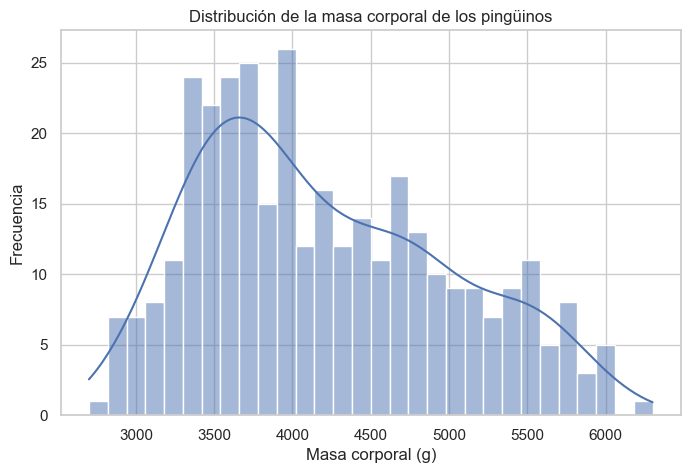

In [3]:

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_clean,
    x="body_mass_g",
    bins=30,
    kde=True
)

plt.title("Distribución de la masa corporal de los pingüinos")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.show()



### Observaciones
- La distribución es **ligeramente asimétrica a la derecha**.
- La mayor concentración se encuentra entre **3500 y 5000 g**.
- No se observan valores extremos muy alejados.



## 2️⃣ Boxplot: Masa corporal por especie

Comparamos la masa corporal entre especies para identificar:
- Diferencias de medianas
- Variabilidad
- Outliers


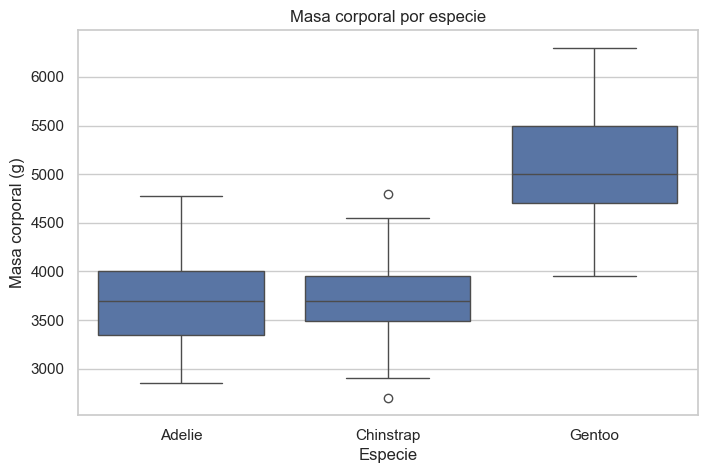

In [4]:

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_clean,
    x="species",
    y="body_mass_g"
)

plt.title("Masa corporal por especie")
plt.xlabel("Especie")
plt.ylabel("Masa corporal (g)")
plt.show()



### Observaciones
- **Gentoo** presenta la mayor masa corporal.
- **Adelie** es la especie más ligera.
- Se observan algunos **outliers superiores** en Gentoo.



## 3️⃣ Scatterplot: Longitud de aleta vs masa corporal

Analizamos la relación entre:
- `flipper_length_mm`
- `body_mass_g`


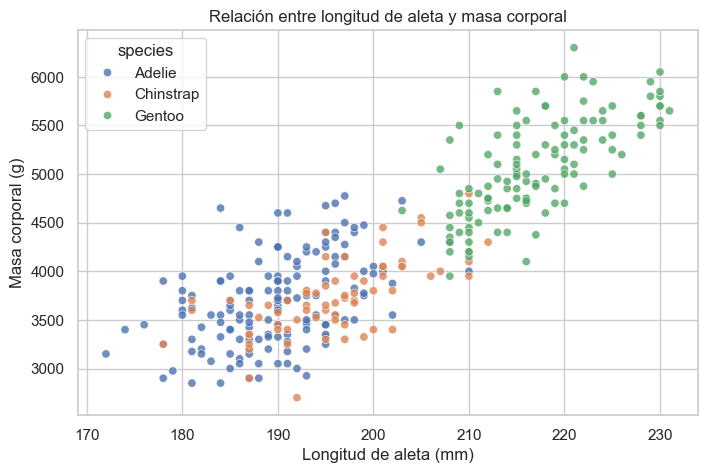

In [5]:

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_clean,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    alpha=0.8
)

plt.title("Relación entre longitud de aleta y masa corporal")
plt.xlabel("Longitud de aleta (mm)")
plt.ylabel("Masa corporal (g)")
plt.show()



### Observaciones
- Existe una **relación positiva clara**.
- Las especies forman **grupos bien definidos**.
- Esta relación sugiere potencial predictivo.



## 4️⃣ Regresión lineal con `sns.lmplot()` (Función avanzada)

Se ajusta una recta de regresión para evaluar la tendencia lineal
entre longitud de aleta y masa corporal, separada por especie.


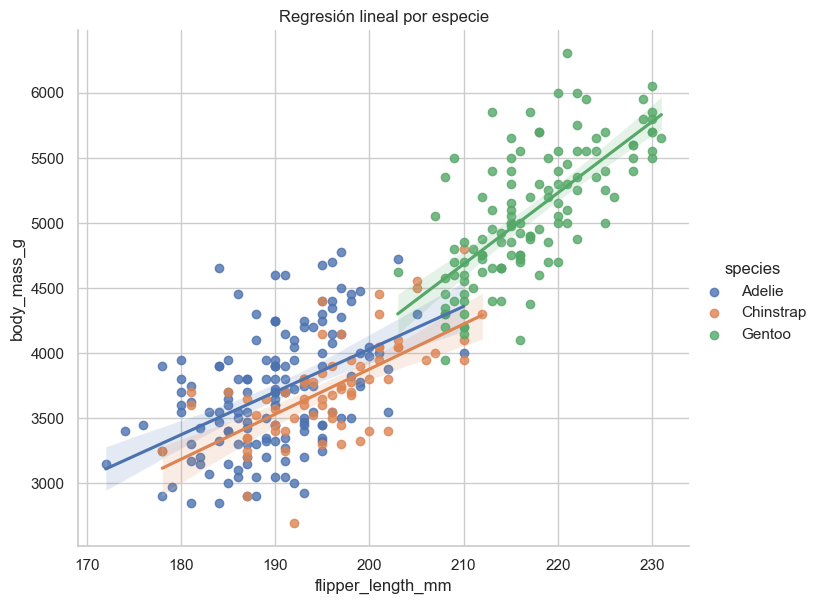

In [6]:

sns.lmplot(
    data=df_clean,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    height=6,
    aspect=1.2
)

plt.title("Regresión lineal por especie")
plt.show()



### Observaciones
- Todas las especies muestran una **tendencia lineal positiva**.
- La pendiente varía ligeramente entre especies.
- Refuerza la relación observada en el scatterplot.



## 5️⃣ Heatmap de correlación

Analizamos la correlación entre variables numéricas clave.


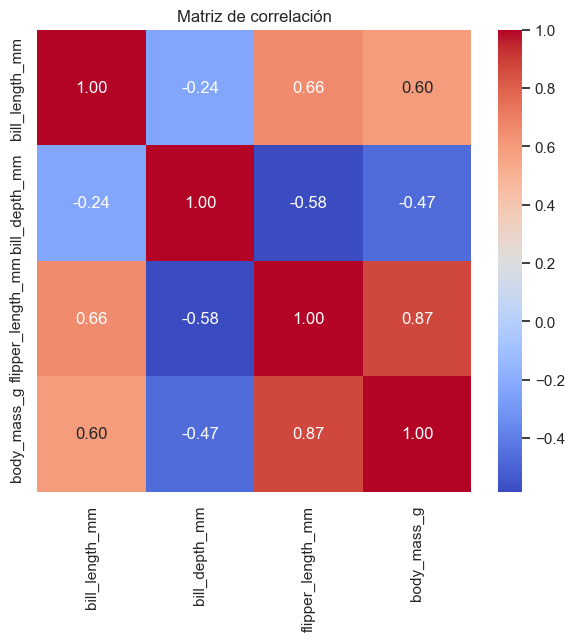

In [7]:

numeric_cols = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
]

corr = df_clean[numeric_cols].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Matriz de correlación")
plt.show()



### Observaciones
- La correlación más fuerte es entre:
  - `flipper_length_mm` y `body_mass_g`
- `bill_depth_mm` presenta correlaciones más débiles.



## 6️⃣ Pairplot multivariado (`sns.pairplot()`)

Visualización conjunta de múltiples relaciones entre variables numéricas,
segmentadas por especie.


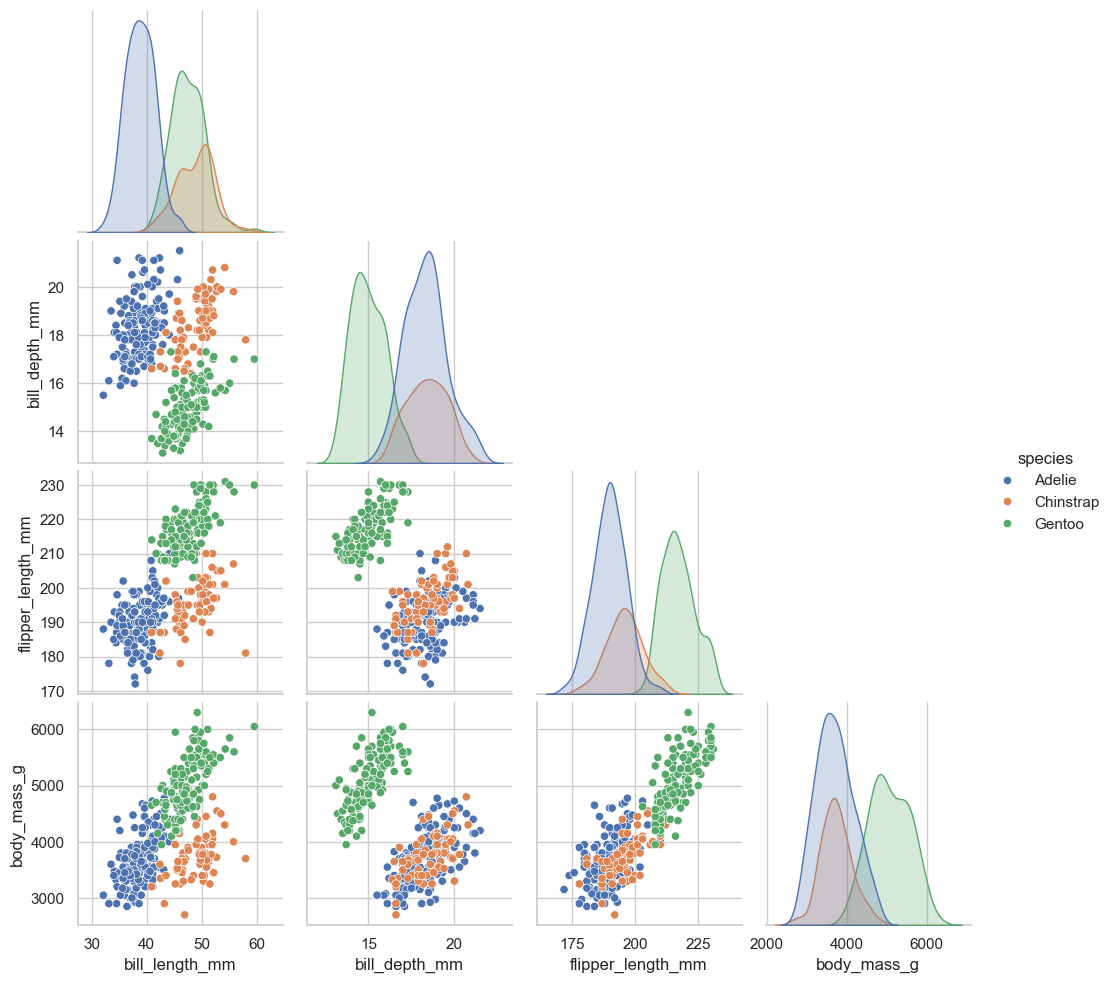

In [8]:

sns.pairplot(
    df_clean,
    vars=numeric_cols,
    hue="species",
    corner=True
)



### Observaciones
- Se confirman **patrones lineales consistentes**.
- Las especies se separan claramente en el espacio multivariado.
- Muy útil para tareas de clasificación.



## Conclusiones finales del proyecto

- El dataset presenta **estructuras claras por especie**.
- Existen **relaciones lineales fuertes** entre variables morfológicas.
- Las visualizaciones permiten identificar patrones, tendencias y outliers.
- Este EDA es una base sólida para modelos de:
  - Clasificación
  - Regresión
  - Análisis multivariado

✅ **Notebook listo para entrega como Proyecto Final (Bloque III)**.
